In [7]:
from stitch import Stitcher
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt
from pyFAI.geometry import Geometry
%matplotlib widget

stitcher = Stitcher(1, 3, 10)
directory = Path("C:\\Users\\Teddy\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 2\\XRD\\TT5-09\\Thick sio2\\rotation 1")
# directory = Path("C:\\Users\\Teddy\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
# directory = Path("D:\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
data, weight = stitcher.load_data(directory)

In [8]:
calibration = Geometry()
calibration.load(directory / "cal.poni")

Detector Detector	 PixelSize= 7.500e-05, 7.500e-05 m	 TopRight (2)
Wavelength= 1.541850e-10 m
SampleDetDist= 1.399198e-01 m	PONI= 1.295004e-02, 1.118481e-01 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 139.920 mm	Center: x=1491.308, y=172.667 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.542Å

929.3327413838165


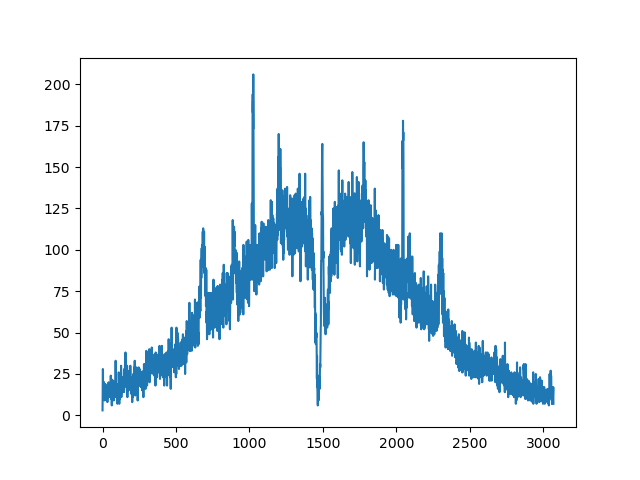

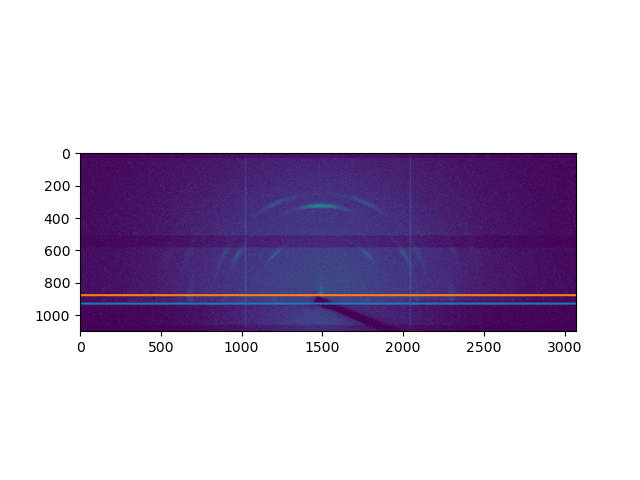

In [9]:
beam_center_y = data.shape[0] - calibration.get_poni1() / calibration.get_pixel1()
beam_center_x = data.shape[1] - calibration.get_poni2() / calibration.get_pixel2()
incidence_degrees_max = 0.8
incidence_max = incidence_degrees_max * np.pi / 180.
print(beam_center_y)
max_height = beam_center_y - np.sin(2 * incidence_max) * calibration.get_dist() / calibration.get_pixel1()
to_plot = np.sum(data[int(max_height):int(beam_center_y), :], axis=0)

plt.figure()
plt.plot(to_plot)

fig, ax = plt.subplots()
ax.imshow(np.log10(data+1))
ax.plot(np.ones(data.shape[1]) * beam_center_y)
ax.plot(np.ones(data.shape[1]) * max_height)

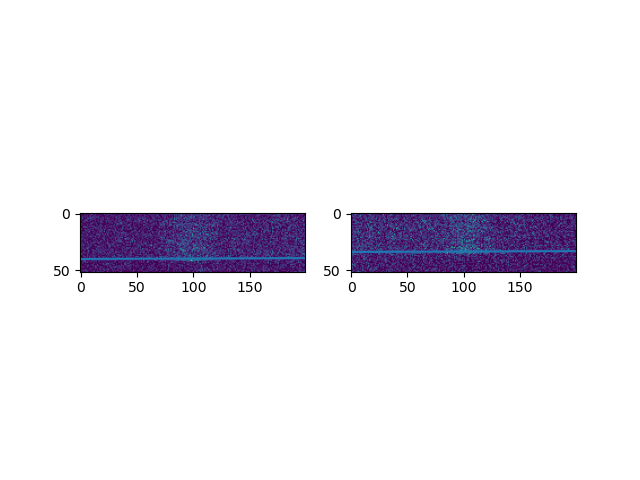

In [14]:
center1 = 685
center2 = 2300

incident_guess_degrees = .24
tilt_guess_degrees = 0.22    # postive direction rotates line counter-clockwise

incident_guess = incident_guess_degrees * np.pi / 180.
tilt_guess = -tilt_guess_degrees * np.pi / 180.

y_reflect = int(beam_center_y - max_height) - np.sin(2 * incident_guess) * calibration.get_dist() / calibration.get_pixel1()
line = np.ones(data.shape[1]) * y_reflect
tilt_adjust = (np.arange(data.shape[1]) - beam_center_x) * np.tan(tilt_guess)
line += tilt_adjust

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(data[int(max_height):int(beam_center_y), (center1 - 100):(center1 + 100)])
ax1.plot(line[(center1 - 100):(center1 + 100)])

ax2.imshow(data[int(max_height):int(beam_center_y), (center2 - 100):(center2 + 100)])
ax2.plot(line[(center2 - 100):(center2 + 100)])